In [1]:
%cd /Users/yantong/Desktop/NLP\ for\ Risk/Code/

In [2]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [3]:
import jieba as jb
import re

In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential


Using TensorFlow backend.


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
 
from sklearn.model_selection import cross_val_score


In [6]:
from sklearn.model_selection import GridSearchCV


In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth",None)
pd.set_option('display.width',None)

In [8]:
labeled_data = pd.read_csv('labeled_data.csv')

In [9]:
labeled_data['word_count'] = labeled_data.apply( lambda x: len(x['content_']), axis = 1 )

In [10]:
labeled_data_2 = labeled_data.copy()

In [11]:
labeled_data_2['content_cut'] = labeled_data_2.content_.apply(lambda x: x[:4000] )

In [12]:
#定义删除除字母,数字，汉字以外的所有符号的函数
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

In [24]:
labeled_data_2['cleaned_word'] = labeled_data_2['content_cut'].apply(remove_punctuation)

In [62]:
# 分词
labeled_data_2['cut_word'] = labeled_data_2['content_cut'].apply(lambda x:  list(jb.cut(x)))

In [60]:
# 分词
#labeled_data_2['cut_word'] = labeled_data_2['content_cut'].apply(lambda x: " ".join([w for w in list(jb.cut(x))]))

In [185]:
labeled_data_3.to_csv('labeled_data_3.csv')

In [65]:
labeled_data_3 = labeled_data_2.copy()

In [66]:
labeled_data_3 = labeled_data_3.drop(['Unnamed: 0'],axis  = 1)

In [67]:
X = labeled_data_3.cut_word
y = labeled_data_3.label

In [68]:
labeled_data_3.head()

,item_name,title,content_,label,word_count,content_cut,cleaned_word,cut_word
0,亏损盈利,中建一局房地产公司学习宣贯局第五次党代会精神,本网讯（通讯员 孙静娴）12月13日上午，中建一局房地产公司组织召开第七次中心组学习（扩大）会，第一时间对中建一局第五次党代会精神进行专题学习宣贯。此次会议在公司总部会议室设主会场1个，各下属经营机构共设分会场11个，参会人员涉及公司领导班子成员、总部部门负责人及以上干部、各下属经营机构负责人、全体党员及群众代表近100余人。会议由局党委委员、公司党委书记、董事长樊飞军主持。\n\n会上，传达学习了罗世威同志在中建一局第五次党代会上所作的《坚持党建引领强化战略执行 永葆组织活力 为创建中国建筑旗下最具核心竞争力的世界一流企业不懈奋斗》的党委工作报告、王希强同志在中建一局第五次党代会上所作的《推进“两个责任”落实 坚决做到“两个维护” 忠实履行党章和宪法赋予的职责 为实现中建一局战略目标提供坚强保障》的纪委工作报告，参会人员对两个报告的内容进行了热烈讨论，并结合企业实际进行了交流研讨。\n\n一是以实施“五大聚焦”和“一化三线”战略为主线，加速实现规模发展。深度聚焦国家重点战略地区，聚焦北京、天津、江苏、浙江和上海等战略区域重点城市，并建立研究工作机制，以“政策性住房”产品线为核心，以普通商品住宅产品线为助力，重点突破苏南、南京、北京、天津、南通、宁波等城市。\n\n二是以推进公司化建设和精细化管理为核心，加速提升竞争优势。要眼界向外，不断对标学习标杆房企、中建系统内优势企业的先进思想和举措，推进企业治理体系建设和公司化建设，强化精细化管理，以规范、科学的工作机制推动企业高质量发展。\n\n三是以紧抓投融资管理和降杠杆减负债为抓手，加速推进高质发展。坚持“两金”压降过程监控，全力降低带息负债。建立健全过程监控管理体系，构建覆盖全生命周期的管理体系，及时识别、防控、化解风险问题，建立风险事项清单及销项制度，加强风险防控与应对能力。\n\n四是坚持党的领导，聚焦新时代高质量党建引领高质量发展，夯实成为中建一局价值和效益新担当。必须坚持思想引领，坚定政治站位，将习近平新时代中国特色社会主义思想和党的十九大、十九届四中全会精神贯穿经营发展全过程。深入践行155大党建工作格局，进一步深化党建工作与生产经营一体化；始终锁定“中建一局效益贡献骨干子企业”的战略目标；始终强化战略执行，做到使命必达；始终强化党风廉政建设，营造风清气正政治生态；始终坚持不懈加强领导班子建设和干部队伍建设，夯实改革发展的组织保障。\n\n五是要继续组织全体人员深入学习贯彻中建一局第五次党代会会议精神。将中建一局党委和纪委的各项工作要求落到实处，为实现公司五年后营业收入300亿，利润总额30亿的目标不懈奋斗！,0,1091,本网讯（通讯员 孙静娴）12月13日上午，中建一局房地产公司组织召开第七次中心组学习（扩大）会，第一时间对中建一局第五次党代会精神进行专题学习宣贯。此次会议在公司总部会议室设主会场1个，各下属经营机构共设分会场11个，参会人员涉及公司领导班子成员、总部部门负责人及以上干部、各下属经营机构负责人、全体党员及群众代表近100余人。会议由局党委委员、公司党委书记、董事长樊飞军主持。\n\n会上，传达学习了罗世威同志在中建一局第五次党代会上所作的《坚持党建引领强化战略执行 永葆组织活力 为创建中国建筑旗下最具核心竞争力的世界一流企业不懈奋斗》的党委工作报告、王希强同志在中建一局第五次党代会上所作的《推进“两个责任”落实 坚决做到“两个维护” 忠实履行党章和宪法赋予的职责 为实现中建一局战略目标提供坚强保障》的纪委工作报告，参会人员对两个报告的内容进行了热烈讨论，并结合企业实际进行了交流研讨。\n\n一是以实施“五大聚焦”和“一化三线”战略为主线，加速实现规模发展。深度聚焦国家重点战略地区，聚焦北京、天津、江苏、浙江和上海等战略区域重点城市，并建立研究工作机制，以“政策性住房”产品线为核心，以普通商品住宅产品线为助力，重点突破苏南、南京、北京、天津、南通、宁波等城市。\n\n二是以推进公司化建设和精细化管理为核心，加速提升竞争优势。要眼界向外，不断对标学习标杆房企、中建系统内优势企业的先进思想和举措，推进企业治理体系建设和公司化建设，强化精细化管理，以规范、科学的工作机制推动企业高质量发展。\n\n三是以紧抓投融资管理和降杠杆减负债为抓手，加速推进高质发展。坚持“两金”压降过程监控，全力降低带息负债。建立健全过程监控管理体系，构建覆盖全生命周期的管理体系，及时识别、防控、化解风险问题，建立风险事项清单及销项制度，加强风险防控与应对能力。\n\n四是坚持党的领导，聚焦新时代高质量党建引领高质量发展，夯实成为中建一局价值和效益新担当。必须坚持思想引领，坚定政治站位，将习近平新时代中国特色社会主义思想和党的十九大、十九届四中全会精神贯穿经营发展全过程。深入践行155大党建工作格局，进一步深化党建工作与生产经营一体化；始终锁定“中建一局效益贡献骨干子企业”的战略目标；始终强化战略执行，做到使命必达；始终强化党风廉政建设，营造风清气正政治生态；始终坚持不懈加强领导班子建设和干部队伍建设，夯实改革发展的组织保障。\n\n五是要继续组织全体人员深入学习贯彻中建一局第五次党代会会议精神。将中建一局党委和纪委的各项工作要求落到实处，为实现公司五年后营业收入300亿，利润总额30亿的目标不懈奋斗！,本网讯通讯员孙静娴12月13日上午中建一局房地产公司组织召开第七次中心组学习扩大会第一时间对中建一局第五次党代会精神进行专题学习宣贯此次会议在公司总部会议室设主会场1个各下属经营机构共设分会场11个参会人员涉及公司领导班子成员总部部门负责人及以上干部各下属经营机构负责人全体党员及群众代表近100余人会议由局党委委员公司党委书记董事长樊飞军主持会上传达学习了罗世威同志在中建一局第五次党代会上所作的坚持党建引领强化战略执行永葆组织活力为创建中国建筑旗下最具核心竞争力的世界一流企业不懈奋斗的党委工作报告王希强同志在中建一局第五次党代会上所作的推进两个责任落实坚决做到两个维护忠实履行党章和宪法赋予的职责为实现中建一局战略目标提供坚强保障的纪委工作报告参会人员对两个报告的内容进行了热烈讨论并结合企业实际进行了交流研讨一是以实施五大聚焦和一化三线战略为主线加速实现规模发展深度聚焦国家重点战略地区聚焦北京天津江苏浙江和上海等战略区域重点城市并建立研究工作机制以政策性住房产品线为核心以普通商品住宅产品线为助力重点突破苏南南京北京天津南通宁波等城市二是以推进公司化建设和精细化管理为核心加速提升竞争优势要眼界向外不断对标学习标杆房企中建系统内优势企业的先进思想和举措推进企业治理体系建设和公司化建设强化精细化管理以规范科学的工作机制推动企业高质量发展三是以紧抓投融资管理和降杠杆减负债为抓手加速推进高质发展坚持两金压降过程监控全力降低带息负债建立健全过程监控管理体系构建覆盖全生命周期的管理体系及时识别防控化解风险问题建立风险事项清单及销项制度加强风险防控与应对能力四是坚持党的领导聚焦新时代高质量党建引领高质量发展夯实成为中建一局价值和效益新担当必须坚持思想引领坚定政治站位将习近平新时代中国特色社会主义思想和党的十九大十九届四中全会精神贯穿经营发展全过程深入践行155大党建工作格局进一步深化党建工作与生产经营一体化始终锁定中建一局效益贡献骨干子企业的战略目标始终强化战略执行做到使命必达始终强化党风廉政建设营造风清气正政治生态始终坚持不懈加强领导班子建设和干部队伍建设夯实改革发展的组织保障五是要继续组织全体人员深入学习贯彻中建一局第五次党代会会议精神将中建一局党委和纪委的各项工作要求落到实处为实现公司五年后营业收入300亿利润总额30亿的目标不懈奋斗,"[本, 网讯, （, 通讯员, , 孙静, 娴, ）, 12, 月, 13, 日, 上午, ，, 中建, 一局, 房地产, 公司, 组织, 召开, 第七次, 中心组, 学习, （, 扩大, ）, 会, ，, 第一, 时间, 对, 中建, 一局, 第五次, 党代会, 精神, 进行, 专题学习, 宣贯, 。, 此次, 会议, 在, 公司总部, 会议室, 设, 主会场, 1, 个, ，, 各, 下属, 经营, 机构, 共设, 分会场, 11, 个, ，, 参会, 人员, 涉及, 公司, 领导班子, 成员, 、, 总部, 部门, 负责人, 及, 以上, 干部, 、, 各, 下属, 经营, 机构, 负责人, 、, 全体, 党员, 及, 群众, 代表, 近, 100, 余人, 。, 会议, 由局, 党委委员, 、, 公司, 党委书记, 、, 董事长, 樊飞军, 主持, 。, \n, ...]"
1,亏损盈利,三项制度改革让“能者上、平者让、庸者下”,原标题：三项制度改革让“能者上、平者让、庸者下”\n\n11月11日，中建一局二公司生产组织中心主任公开竞聘面试正在进行，经过前期的资料审核、岗位资格审查和管理测评，共有3名竞聘人员进入最终的结构化面试环节。\n\n孟繁健是参加本次竞聘的人员之一，而这并不是他第一次参加公司的市场化公开竞聘。3年前，孟繁健通过竞聘成为公司某项目的总监，3年后，尝到竞聘“甜头”的孟繁健决定挑战新岗位、迎接新任务。\n\n随着改革的深入推进，中建一局二公司在市场化经营机制改革方面不断强化升级，近两年完成了公司总部部门副职以上的全员公开竞聘上岗，为进一步实施市场化

### kashgari

In [118]:
!pip install bert-embedding


     |████████████████████████████████| 13.5 MB 720 kB/s eta 0:00:01
     |████████████████████████████████| 24.4 MB 925 kB/s eta 0:00:01
     |████████████████████████████████| 209 kB 20.9 MB/s eta 0:00:01
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259916 sha256=68bfa956691a2242c2d746cb5b7a71e197fb217aaa2f5f90fca03a79661dfbcb
  Stored in directory: /Users/yantong/Library/Caches/pip/wheels/44/1b/6e/f9f9ab79b9892b7792be58ea33c03b504824e064c721b637f5
Successfully built gluonnlp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.1 requires numpy<1.19.0,>

In [178]:
!pip install imbalanced-learn

     |████████████████████████████████| 167 kB 6.9 kB/s eta 0:00:01


In [179]:
import imblearn


In [152]:
import kashgari
from kashgari import utils
from kashgari.embeddings import BertEmbedding
from kashgari.tasks.labeling import BiLSTM_CRF_Model
# from data_load import DataReader

In [22]:
from sklearn.model_selection import train_test_split


In [38]:
from tensorflow.keras.callbacks import TensorBoard
from kashgari.tasks.classification import CNN_Model

In [110]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, 
                                                                                 labeled_data_3.index, 
                                                                                 test_size=0.2, stratify=y, random_state=0)
X_test = X_test.tolist()
y_test = y_test.tolist()

In [111]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, 
                                                                                 labeled_data_3.index, 
                                                                                 test_size=0.2, stratify=y, random_state=0)
X_test = X_test.tolist()
y_test = y_test.tolist()



X_train, X_val, y_train, y_val, indices_train, indices_val = train_test_split(X_train, y_train, 
                                                                                 indices_train, 
                                                                                 test_size=0.05, stratify=y_train, random_state=0)

X_train = X_train.tolist()
y_train = y_train.tolist()
X_val = X_val.tolist()
y_val = y_val.tolist()



In [183]:
y_train[1]

0

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
#features = tfidf.fit_transform(labeled_data_3.cut_word)
#labels = labeled_data_3.label
#print(features.shape)
#print('-----------------------------')
#print(features)
#print(labels)

In [112]:
# Using TensorBoard record training process
tf_board = TensorBoard(log_dir='tf_dir/cnn_model',
                       histogram_freq=5,
                       update_freq='batch')


In [114]:
model = CNN_Model()
model.fit(X_train, y_train, X_val, y_val,
          batch_size=128,
          callbacks=[tf_board])

Preparing text vocab dict: 100%|██████████| 362/362 [00:00<00:00, 1712.51it/s]
2020-12-17 10:58:28,650 [DEBUG] kashgari - --- Build vocab dict finished, Total: 56262 ---
2020-12-17 10:58:28,651 [DEBUG] kashgari - Top-10: ['[PAD]', '[UNK]', '[CLS]', '[SEP]', '，', '的', '。', '\n', '、', '在']
Calculating sequence length: 100%|██████████| 362/362 [00:00<00:00, 518735.24it/s]
2020-12-17 10:58:28,732 [DEBUG] kashgari - Calculated sequence length = 2052
2020-12-17 10:58:28,780 [DEBUG] kashgari - Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None)]            0         
_________________________________________________________________
layer_embedding (Embedding)  (None, None, 100)         5626200   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         64128     
_______________________

Epoch 1/5
53/53 [==============================] - 31s 576ms/step - loss: 0.2846 - accuracy: 0.9363 - val_loss: 0.2424 - val_accuracy: 0.9297
Epoch 2/5
53/53 [==============================] - 28s 534ms/step - loss: 0.1984 - accuracy: 0.9357 - val_loss: 0.1957 - val_accuracy: 0.9336
Epoch 3/5
53/53 [==============================] - 28s 535ms/step - loss: 0.1262 - accuracy: 0.9504 - val_loss: 0.1329 - val_accuracy: 0.9531
Epoch 4/5
53/53 [==============================] - 29s 541ms/step - loss: 0.0510 - accuracy: 0.9831 - val_loss: 0.1223 - val_accuracy: 0.9609
Epoch 5/5
53/53 [==============================] - 28s 537ms/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 0.1835 - val_accuracy: 0.9570


In [115]:
model.evaluate(X_test, y_test)

2020-12-17 11:00:58,730 [WARNING] kashgari - Sequence length is None, will use the max length of the samples, which is 2478
2020-12-17 11:00:59,258 [DEBUG] kashgari - predict input shape (1806, 2478) x: 
[[   2 3254   44 ...    0    0    0]
 [   2  171 4292 ...    0    0    0]
 [   2   83   17 ...    0    0    0]
 ...
 [   2   18   92 ...    0    0    0]
 [   2   30   44 ...    0    0    0]
 [   2    9  715 ...    0    0    0]]
2020-12-17 11:01:01,777 [DEBUG] kashgari - predict output shape (1806, 2)
2020-12-17 11:01:01,779 [DEBUG] kashgari - predict output argmax: [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0     0.9596    0.9829    0.9711      1691
           1     0.6081    0.3913    0.4762       115

    accuracy                         0.9452      1806
   macro avg     0.7838    0.6871    0.7236      1806
weighted avg     0.9372    0.9452    0.9396      1806



{'detail': {'0': {'precision': 0.9595842956120092,
   'recall': 0.9828503843879361,
   'f1-score': 0.9710780017528484,
   'support': 1691},
  '1': {'precision': 0.6081081081081081,
   'recall': 0.391304347826087,
   'f1-score': 0.4761904761904763,
   'support': 115},
  'accuracy': 0.9451827242524917,
  'macro avg': {'precision': 0.7838462018600587,
   'recall': 0.6870773661070115,
   'f1-score': 0.7236342389716623,
   'support': 1806},
  'weighted avg': {'precision': 0.9372034752560023,
   'recall': 0.9451827242524917,
   'f1-score': 0.9395652301915679,
   'support': 1806}},
 'precision': 0.9372034752560023,
 'recall': 0.9451827242524917,
 'f1-score': 0.9395652301915679,
 'support': 1806}

In [167]:
model.save('./model')


2020-12-17 11:38:16,625 [INFO] kashgari - model saved to /Users/yantong/Desktop/NLP for Risk/Code/model


'/Users/yantong/Desktop/NLP for Risk/Code/model'

In [168]:

import random
import kashgari
# 加载模型
loaded_model = kashgari.utils.load_model('cnn_classification_model')
loaded_model.predict(random.sample(train_x, 10))

# 预测指定样本
news_sample = """「DeepMind 击败人类职业玩家的方式与他们声称的 AI 使命，以及所声称的『正确』方式完全相反。」
DeepMind 的人工智能 AlphaStar 一战成名，击败两名人类职业选手。掌声和欢呼之余，它也引起了一些质疑。在前天 DeepMind 举办的 AMA 中，AlphaStar 项目领导者 Oriol Vinyals 和 David Silver、职业玩家 LiquidTLO 与 LiquidMaNa 回答了一些疑问。不过困惑依然存在……
"""
x = list(jieba.cut(news_sample))
y = loaded_model.predict([x])
print(y[0]) # 输出游戏

/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The 'load_model' function is deprecated, use 'XX_Model.load_model' instead
  after removing the cwd from sys.path.


FileNotFoundError: [Errno 2] No such file or directory: 'cnn_classification_model/model_config.json'

### word2vec embedding

In [240]:
with open('./stopwords.txt', encoding='utf8') as file:
    line_list = file.readlines()
    stopword_list = [k.strip() for k in line_list]
    stopword_set = set(stopword_list)
    print('停顿词列表，即变量stopword_list中共有%d个元素' %len(stopword_list))
    print('停顿词集合，即变量stopword_set中共有%d个元素' %len(stopword_set))

停顿词列表，即变量stopword_list中共有2218个元素
停顿词集合，即变量stopword_set中共有758个元素


In [241]:
import jieba
import time

cutWords_list = []
startTime = time.time()
content_series = labeled_data_3['content_cut']
for i in range(len(content_series)):
    content = content_series.iloc[i]
    cutWords = [k for k in jieba.cut(content, True) if k not in stopword_set]
    if (i+1) % 3000 == 0:
        usedTime = time.time() - startTime
        print('前%d篇文章分词共花费%.2f秒' %(i+1, usedTime))
    cutWords_list.append(cutWords)

前3000篇文章分词共花费7.31秒
前6000篇文章分词共花费14.00秒
前9000篇文章分词共花费20.96秒


In [219]:
txtFilePath = 'saved_variable/cutWords_list.txt'
with open(txtFilePath, 'w', encoding='utf8') as file:
    for cutWords in cutWords_list:
        file.write(' '.join(cutWords))
        file.write('\n')

In [220]:
txtFilePath = 'saved_variable/cutWords_list.txt'
with open(txtFilePath, 'r', encoding='utf8') as file:
    cutWords_list = [k.split(' ') for k in file.readlines()]

In [ ]:
### word2vec 

In [221]:
!pip install gensim


In [242]:
from gensim.models import Word2Vec
startTime = time.time()
word2vec_model = Word2Vec(cutWords_list, size=200, iter=10, min_count=20)
usedTime = time.time() - startTime
print('形成word2vec模型共花费%.2f秒' %usedTime)


形成word2vec模型共花费52.15秒


In [243]:
import warnings

warnings.filterwarnings('ignore')

In [327]:
word2vec_model.wv.most_similar('花费')


[('将近', 0.637224018573761),
 ('节省', 0.6314343810081482),
 ('耗费', 0.6210459470748901),
 ('几分钟', 0.6001276969909668),
 ('挣', 0.5956820249557495),
 ('几百', 0.573562502861023),
 ('要到', 0.5733745694160461),
 ('几分', 0.5725728273391724),
 ('剩下', 0.5674697756767273),
 ('路程', 0.5571792721748352)]

In [323]:
word2vec_model.similarity('治愈','感染')

0.6077843

In [226]:
#使用pickle库保存 word2vec模型
import pickle 

pickleFilePath = 'saved_variable/word2vec_model.pickle'
with open(pickleFilePath, 'wb') as file:
    pickle.dump(word2vec_model, file)

In [227]:
#使用pickle库加载word2vec模型
import pickle 

pickleFilePath = 'saved_variable/word2vec_model.pickle'
with open(pickleFilePath, 'rb') as file:
    word2vec_model = pickle.load(file)

### 每篇文章的内容表示成向量

In [245]:
import numpy as np

def get_contentVector(cutWords, word2vec_model):
    vector_list = [word2vec_model.wv[k] for k in cutWords if k in word2vec_model]
    contentVector = np.array(vector_list).mean(axis=0)
    return contentVector

In [246]:
import time

startTime = time.time()
contentVector_list = []
for i in range(len(cutWords_list)):
    cutWords = cutWords_list[i]
    if (i+1) % 3000 == 0:
        usedTime = time.time() - startTime
        #print('前%d篇文章内容表示成向量共花费%.2f秒' %(i+1, usedTime))
    contentVector_list.append(get_contentVector(cutWords, word2vec_model))
X = np.array(contentVector_list)

In [247]:
X.shape

(9027, 200)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [234]:
txtFilePath = 'saved_variable/X.txt'
X.dump(txtFilePath)


In [248]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(labeled_data_3['label'])

In [249]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [250]:
print(X.shape, y.shape)


(9027, 200) (9027,)


In [251]:
X.to_csv('word2vec_X.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [253]:
word2vec_X = pd.DataFrame(X)

In [255]:
word2vec_y = pd.DataFrame(y)

In [256]:
word2vec_X.to_csv('word2vec_X.csv')

In [257]:
word2vec_y.to_csv('word2vec_y.csv')

### Word2Vec LR

In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


train_X_lr, test_X_lr, train_y_lr, test_y_lr = train_test_split(X, y, test_size=0.2)
logisticRegression_model = LogisticRegression()
logisticRegression_model.fit(train_X_lr, train_y_lr)
logisticRegression_model.score(test_X_lr, test_y_lr)

0.9490586932447398

In [279]:
y_pred_lr = logisticRegression_model.predict(test_X_lr)

In [282]:
print(classification_report(test_y_lr, y_pred_lr,digits=4))

              precision    recall  f1-score   support

           0     0.9539    0.9928    0.9730      1667
           1     0.8310    0.4245    0.5619       139

    accuracy                         0.9491      1806
   macro avg     0.8924    0.7086    0.7674      1806
weighted avg     0.9444    0.9491    0.9413      1806



In [291]:
mat = confusion_matrix(test_y_lr, y_pred_lr)

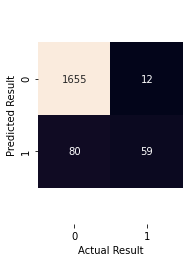

In [292]:
sns.heatmap(mat, square=True, annot=True, cbar=False,fmt='.20g')
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b) 
plt.show() 

In [296]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [297]:
predslog = logisticRegression_model.predict_proba(test_X_lr)[:,1]
metrics.roc_auc_score(test_y_lr,predslog, average='macro', sample_weight=None)

0.9430329761385854

In [298]:
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR')
    plt.xlabel('FPR')

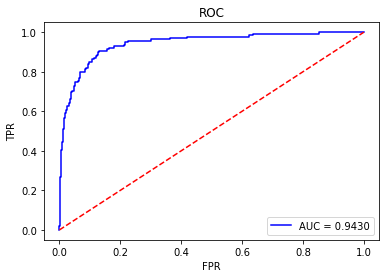

In [300]:
plot_roc(test_y_lr,predslog)

RangeIndex(start=0, stop=9027, step=1)

In [303]:
test_y_lr.shape

(1806,)

### Word2Vec SVM

In [283]:
#训练模型
model_svm = LinearSVC()
train_X_svm, test_X_svm, train_y_svm, test_y_svm = train_test_split(X, y, test_size=0.2)


model_svm.fit(train_X_svm, train_y_svm)
y_pred_svm = model_svm.predict(test_X_svm)


In [285]:
print(classification_report(test_y_svm, y_pred_svm,digits=4))

              precision    recall  f1-score   support

           0     0.9593    0.9859    0.9724      1699
           1     0.6000    0.3364    0.4311       107

    accuracy                         0.9474      1806
   macro avg     0.7797    0.6612    0.7018      1806
weighted avg     0.9380    0.9474    0.9404      1806



### Word2Vec CNN

In [262]:
X_train_1, X_test_1, y_train_1, y_test_1, indices_train_1, indices_test_1 = train_test_split(X, y, 
                                                                                 labeled_data_3.index, 
                                                                                 test_size=0.2, stratify=y, random_state=0)



In [263]:

X_train_1, X_val_1, y_train_1, y_val_1, indices_train_1, indices_val_1 = train_test_split(X_train, y_train, 
                                                                                 indices_train, 
                                                                                 test_size=0.05, stratify=y_train, random_state=0)




In [265]:
# Using TensorBoard record training process
tf_board_1 = TensorBoard(log_dir='tf_dir_1/cnn_model',
                       histogram_freq=5,
                       update_freq='batch')


In [266]:
model_wv = CNN_Model()
model_wv.fit(X_train_1, y_train_1, X_val_1, y_val_1,
          batch_size=128,
          callbacks=[tf_board_1])

Preparing text vocab dict: 100%|██████████| 343/343 [00:00<00:00, 4143.12it/s]
2020-12-17 16:00:47,809 [DEBUG] kashgari - --- Build vocab dict finished, Total: 54756 ---
2020-12-17 16:00:47,810 [DEBUG] kashgari - Top-10: ['[PAD]', '[UNK]', '[CLS]', '[SEP]', '，', '的', '。', '\n', '、', '在']
Calculating sequence length: 100%|██████████| 343/343 [00:00<00:00, 801027.99it/s]
2020-12-17 16:00:47,978 [DEBUG] kashgari - Calculated sequence length = 2073
2020-12-17 16:00:48,076 [DEBUG] kashgari - Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, None)]            0         
_________________________________________________________________
layer_embedding (Embedding)  (None, None, 100)         5475600   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 128)         64128     
_______________________

Epoch 1/5
50/50 [==============================] - 30s 607ms/step - loss: 0.2864 - accuracy: 0.9358 - val_loss: 0.2533 - val_accuracy: 0.9258
Epoch 2/5
50/50 [==============================] - 29s 588ms/step - loss: 0.2012 - accuracy: 0.9358 - val_loss: 0.1802 - val_accuracy: 0.9414
Epoch 3/5
50/50 [==============================] - 30s 607ms/step - loss: 0.1358 - accuracy: 0.9440 - val_loss: 0.1126 - val_accuracy: 0.9727
Epoch 4/5
50/50 [==============================] - 32s 638ms/step - loss: 0.0619 - accuracy: 0.9803 - val_loss: 0.1206 - val_accuracy: 0.9648
Epoch 5/5
50/50 [==============================] - 29s 577ms/step - loss: 0.0214 - accuracy: 0.9951 - val_loss: 0.1327 - val_accuracy: 0.9688


In [288]:
model_wv.evaluate(X_test_1, y_test_1)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

### keras+rnn + zhihu word vectors
http://blog.gqylpy.com/gqy/16756/

#### 0.需要的库

In [328]:
# 首先加载必用的库，jieba和gensim专门中文 
# %matplotlib inline功能是可以内嵌绘图，并且可以省略掉plt.show()这一步
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import re #正则化用
import jieba # 中文必须用【结巴分词】，因为计算机不会断句
# gensim用来加载预训练word vector
from gensim.models import KeyedVectors
#KeyedVectors实现实体（单词、文档、图片都可以）和向量之间的映射，实体都用string id表示
#有时候运行代码时会有很多warning输出，如提醒新版本之类的，如果不想乱糟糟的输出可以这样
import warnings
warnings.filterwarnings("ignore")

#### 1.预训练词向量

In [ ]:
cn_model = KeyedVectors.load_word2vec_format('chinese_word_vectors/sgns.zhihu.bigram', 
                                          binary=False)

#### 2.词向量模型

In [ ]:
# 由此可见每一个词都对应一个长度为300的向量
embedding_dim = cn_model['山东大学'].shape[0]  #一词山东大学，shape[0]返回行数
print('词向量的长度为{}'.format(embedding_dim))
cn_model['山东大学']

In [ ]:
# 计算相似度
cn_model.similarity('橘子', '橙子')

In [ ]:
# dot（'橘子'/|'橘子'|， '橙子'/|'橙子'| ），余弦相似度
np.dot(cn_model['橘子']/np.linalg.norm(cn_model['橘子']), 
cn_model['橙子']/np.linalg.norm(cn_model['橙子']))

In [ ]:
# 找出最相近的词，余弦相似度
cn_model.most_similar(positive=['大学'], topn=10)

In [ ]:
# 找出不同的词
test_words = '老师 会计师 程序员 律师 医生 老人'
test_words_result = cn_model.doesnt_match(test_words.split())
print('在 '+test_words+' 中:\n不是同一类别的词为: %s' %test_words_result)

In [ ]:
cn_model.most_similar(positive=['女人','出轨'], negative=['男人'], topn=1)

#### 3.训练语料 （数据集）

In [329]:
# 我们使用tensorflow的keras接口来建模
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional#Dense全连接
#Bidirectional双向LSTM  callbacks用来调参
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

#### 4.分词和tokenize

In [ ]:
# 进行分词和tokenize
# train_tokens是一个长长的list，其中含有4000个小list，对应每一条评价
train_tokens = []
for text in train_texts_orig:
    # 去掉标点
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    # 结巴分词
    cut = jieba.cut(text)
    # 结巴分词的输出结果为一个生成器
    # 把生成器转换为list
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            # 将词转换为索引index
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            # 如果词不在字典中，则输出0
            cut_list[i] = 0
    train_tokens.append(cut_list)

#### 5.索引长度标准化
因为每段评语的长度是不一样的，我们如果单纯取最长的一个评语，并把其他评填充成同样的长度，这样十分浪费计算资源，所以我们取一个折衷的长度。

In [ ]:
# 获得所有tokens的长度
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)


In [ ]:
# 平均tokens的长度
np.mean(num_tokens)

In [ ]:
# 最长的评价tokens的长度
np.max(num_tokens)

In [ ]:
plt.hist(np.log(num_tokens), bins = 100)#有大有小取对数
plt.xlim((0,20))
plt.ylabel('number of tokens')
plt.xlabel('length of tokens')
plt.title('Distribution of tokens length')
plt.show()

In [ ]:
# 取tokens平均值并加上两个tokens的标准差，
# 假设tokens长度的分布为正态分布，则max_tokens这个值可以涵盖95%左右的样本
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

In [ ]:
# 取tokens的长度为236时，大约95%的样本被涵盖
# 我们对长度不足的进行padding，超长的进行修剪
np.sum( num_tokens < max_tokens ) / len(num_tokens)

#### 6.反向tokenize
为了之后来验证 我们定义一个function，用来把索引转换成可阅读的文本，这对于debug很重要。



In [ ]:
# 用来将tokens转换为文本
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index2word[i]
        else:
            text = text + ' '
    return text


In [ ]:
reverse = reverse_tokens(train_tokens[0])


In [ ]:
# 经过tokenize再恢复成文本
# 可见标点符号都没有了
reverse

In [ ]:
# 原始文本
train_texts_orig[0]


#### 7.构建embedding matrix
现在我们来为模型准备embedding matrix（词向量矩阵），根据keras的要求，我们需要准备一个维度为(numwords, embeddingdim)的矩阵【num words代表我们使用的词汇的数量，emdedding dimension在我们现在使用的预训练词向量模型中是300，每一个词汇都用一个长度为300的向量表示】注意我们只选择使用前50k个使用频率最高的词，在这个预训练词向量模型中，一共有260万词汇量，如果全部使用在分类问题上会很浪费计算资源，因为我们的训练样本很小，一共只有4k，如果我们有100k，200k甚至更多的训练样本时，在分类问题上可以考虑减少使用的词汇量。

In [ ]:
embedding_dim


In [ ]:
# 只使用大库前50000个词
num_words = 50000
# 初始化embedding_matrix，之后在keras上进行应用
embedding_matrix = np.zeros((num_words, embedding_dim))
# embedding_matrix为一个 [num_words，embedding_dim] 的矩阵
# 维度为 50000 * 300
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')


In [ ]:
# 检查index是否对应，
# 输出300意义为长度为300的embedding向量一一对应
np.sum( cn_model[cn_model.index2word[333]] == embedding_matrix[333] )

In [ ]:
# embedding_matrix的维度，
# 这个维度为keras的要求，后续会在模型中用到
embedding_matrix.shape

#### 8.padding(填充)和truncating(修剪)
我们把文本转换为tokens（索引）之后，每一串索引的长度并不相等，所以为了方便模型的训练我们需要把索引的长度标准化，上面我们选择了236这个可以涵盖95%训练样本的长度，接下来我们进行padding和truncating，我们一般采用’pre’的方法，这会在文本索引的前面填充0，因为根据一些研究资料中的实践，如果在文本索引后面填充0的话，会对模型造成一些不良影响

In [ ]:
# 进行padding和truncating， 输入的train_tokens是一个list
# 返回的train_pad是一个numpy array
train_pad = pad_sequences(train_tokens, maxlen=max_tokens,
                            padding='pre', truncating='pre')


In [ ]:
# 超出五万个词向量的词用0代替
train_pad[ train_pad>=num_words ] = 0

In [ ]:
# 可见padding之后前面的tokens全变成0，文本在最后面
train_pad[33]

In [ ]:
# 准备target向量，前2000样本为1，后2000为0
train_target = np.concatenate( (np.ones(2000),np.zeros(2000)) )


In [ ]:
# 进行训练和测试样本的分割
from sklearn.model_selection import train_test_split


In [ ]:
train_target.shape
train_pad.shape

In [ ]:
# 90%的样本用来训练，剩余10%用来测试
#因为前2000个文件夹都是neg一类，所以打乱顺序来训练 random_state
X_train, X_test, y_train, y_test = train_test_split(train_pad,
                                                    train_target,
                                                    test_size=0.1,
                                                    random_state=12
                                                    )


In [ ]:
# 查看训练样本，确认无误
print(reverse_tokens(X_train[35]))
print('class: ',y_train[35])

#### 9.用keras搭建LSTM模型

In [ ]:
# 用LSTM对样本进行分类
model = Sequential()

In [ ]:
# 模型第一层为embedding，trainable=False因为embedding_matrix下载后已经训练好了
model.add(Embedding(num_words,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_tokens,
                    trainable=False))

In [ ]:
model.add(Bidirectional(LSTM(units=32, return_sequences=True)))#双向LSTM考虑前后词
model.add(LSTM(units=16, return_sequences=False))#units=16神经元个数

In [ ]:
#加入全连接层
model.add(Dense(1, activation='sigmoid'))
# 我们使用adam以0.001的learning rate进行优化
optimizer = Adam(lr=1e-3)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,  
              metrics=['accuracy'])

In [ ]:
# 我们来看一下模型的结构，一共90k左右可训练的变量，None表示batchsize,一个batch有236词输入
#15000000为50000*300，因为train=false,所以不训练这些参数
#17=16*1+1(bias为一参数)
model.summary()

In [ ]:
# 建立一个权重的存储点，verbose=1可以是打印信息更加详细，方面查找问题
path_checkpoint = 'sentiment_checkpoint.keras'
checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss',
                                      verbose=1, save_weights_only=True,
                                      save_best_only=True)


In [ ]:
# 尝试加载已训练模型
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

In [ ]:
# 定义early stoping如果3个epoch内validation loss没有改善则停止训练
earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)


In [ ]:
# 自动降低learning rate
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1, min_lr=1e-5, patience=0,
                                       verbose=1)

In [ ]:
# 定义callback函数
callbacks = [
    earlystopping, 
    checkpoint,
    lr_reduction
]

In [ ]:
# 开始训练，4000*0.1=400为test，validation_split=0.1为3600*0.1
model.fit(X_train, y_train,
          validation_split=0.1, 
          epochs=4,
          batch_size=128,
          callbacks=callbacks)

#### 10.结论
我们定义一个预测函数（将输入文本按模型要求处理再输入），来预测输入的文本的极性，可见模型对于否定句和一些简单的逻辑结构都可以进行准确的判断。


In [ ]:

result = model.evaluate(X_test, y_test)
print('Accuracy:{0:.2%}'.format(result[1]))

In [ ]:
def predict_sentiment(text):
    print(text)
    # 去标点
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    # 分词
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    # tokenize
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            cut_list[i] = 0
    # padding
    tokens_pad = pad_sequences([cut_list], maxlen=max_tokens,
                           padding='pre', truncating='pre')
    # 预测
    result = model.predict(x=tokens_pad)
    coef = result[0][0]
    if coef >= 0.5:
        print('是一例正面评价','output=%.2f'%coef)
    else:
        print('是一例负面评价','output=%.2f'%coef)

In [ ]:
test_list = [
    '酒店设施不是新的，服务态度不好',
    '房间很凉爽，空调冷气很足',
    '酒店环境不好，住宿体验很不好',
    '房间隔音不到位' ,
    '晚上回来发现没有打扫卫生'   
]
for text in test_list:
    predict_sentiment(text)


#### 11.错误分类

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.T[0]
y_pred = [1 if p>= 0.5 else 0 for p in y_pred]
y_pred = np.array(y_pred)


In [ ]:
y_actual = np.array(y_test)


In [ ]:
# 找出错误分类的索引
misclassified = np.where( y_pred != y_actual )[0]


In [ ]:
# 输出所有错误分类的索引，在test400条中有48条分错
len(misclassified)
print(len(misclassified))


In [ ]:
# 我们来找出错误分类的样本看看，misclassified[1]打出第二条分错的
idx=misclassified[1]
print(reverse_tokens(X_test[idx]))
print('预测的分类', y_pred[idx])
print('实际的分类', y_actual[idx])
